In [1]:
%matplotlib inline

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from edos import  *

In [15]:
def get_interest(t,m_inicial,interes):
  dmdt = (m_inicial+(m_inicial * interes) ) - 1000
  return dmdt

In [16]:
#1 a variables
m_inicial = 5000
interes = 0.05
t1 = 0
t2 = 10

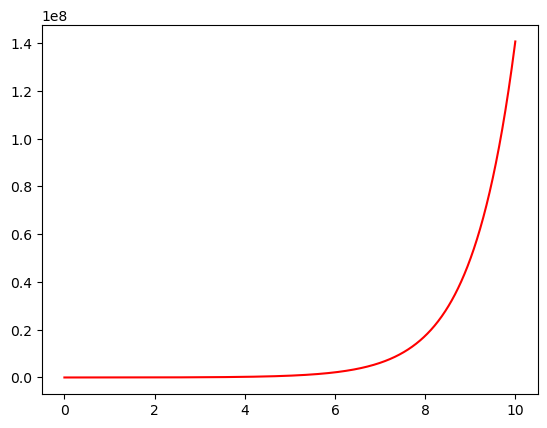

In [17]:
res = get_euler(t1,t2,m_inicial,get_interest,0.01,interes)  #t0, tf, presente, direccion, dt , *args
plt.plot(res[1], res[0], c='red', label="simulacion")

Text(0, 0.5, 'dinero')

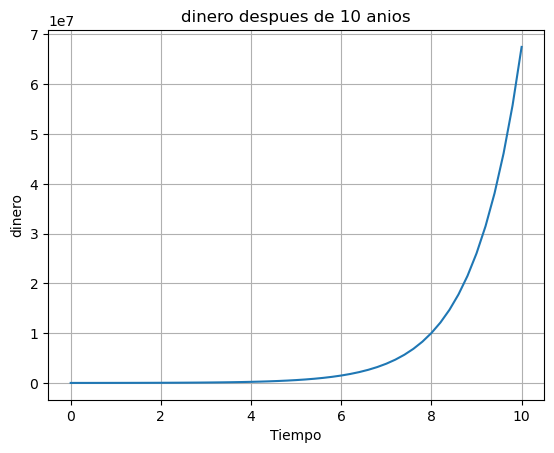

In [18]:
# 1 b
mf,t = get_euler(t1,t2,m_inicial,get_interest,0.2,interes)  #t0, tf, presente, direccion, dt , *args
plt.plot(t, mf)
plt.title("dinero despues de 10 anios")
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("dinero")
# tenemos al rededor de 5 - 8 millones despues de 10 anios

In [19]:
# 1 c  el dinero tranquilamente podria durar muchos anios mas 
# esto debido a que 5 % es una gran tasa de interes aun incluso gastante

In [20]:
#2 
from logistica import *
import h5py

In [21]:
data=h5py.File("data02.h5",'r')
#print(data.keys())
X=data["X"][:]
y=data["y"][:]

In [22]:
#X, y

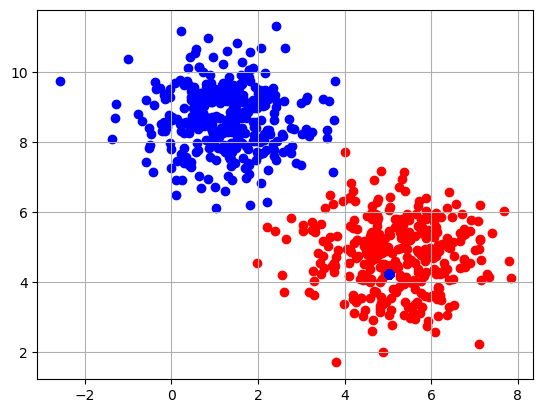

In [23]:
l=Logistica()
l.fit(X,y)
l.inicializar_parametros()
l.graficar_data()
# 2 b (b) Según la gráfica, el kernel debe ser p olinomial

In [ ]:
l.ecuacion_normal()

In [ ]:
# 2 c , entrenamos y mostramos
historial=l.descenso_gradiente(0.01)
plt.plot(range(historial.size),historial)
print(l.getParametros()) # theta
print(len(l.getParametros()) # tam de theta
l.graficar_data(True)
# 3 d 

In [48]:
#  4  
data2=h5py.File("prendas_dataset.h5",'r')




In [59]:
images = data2['X']
print(images.shape)

(60000, 28, 28)


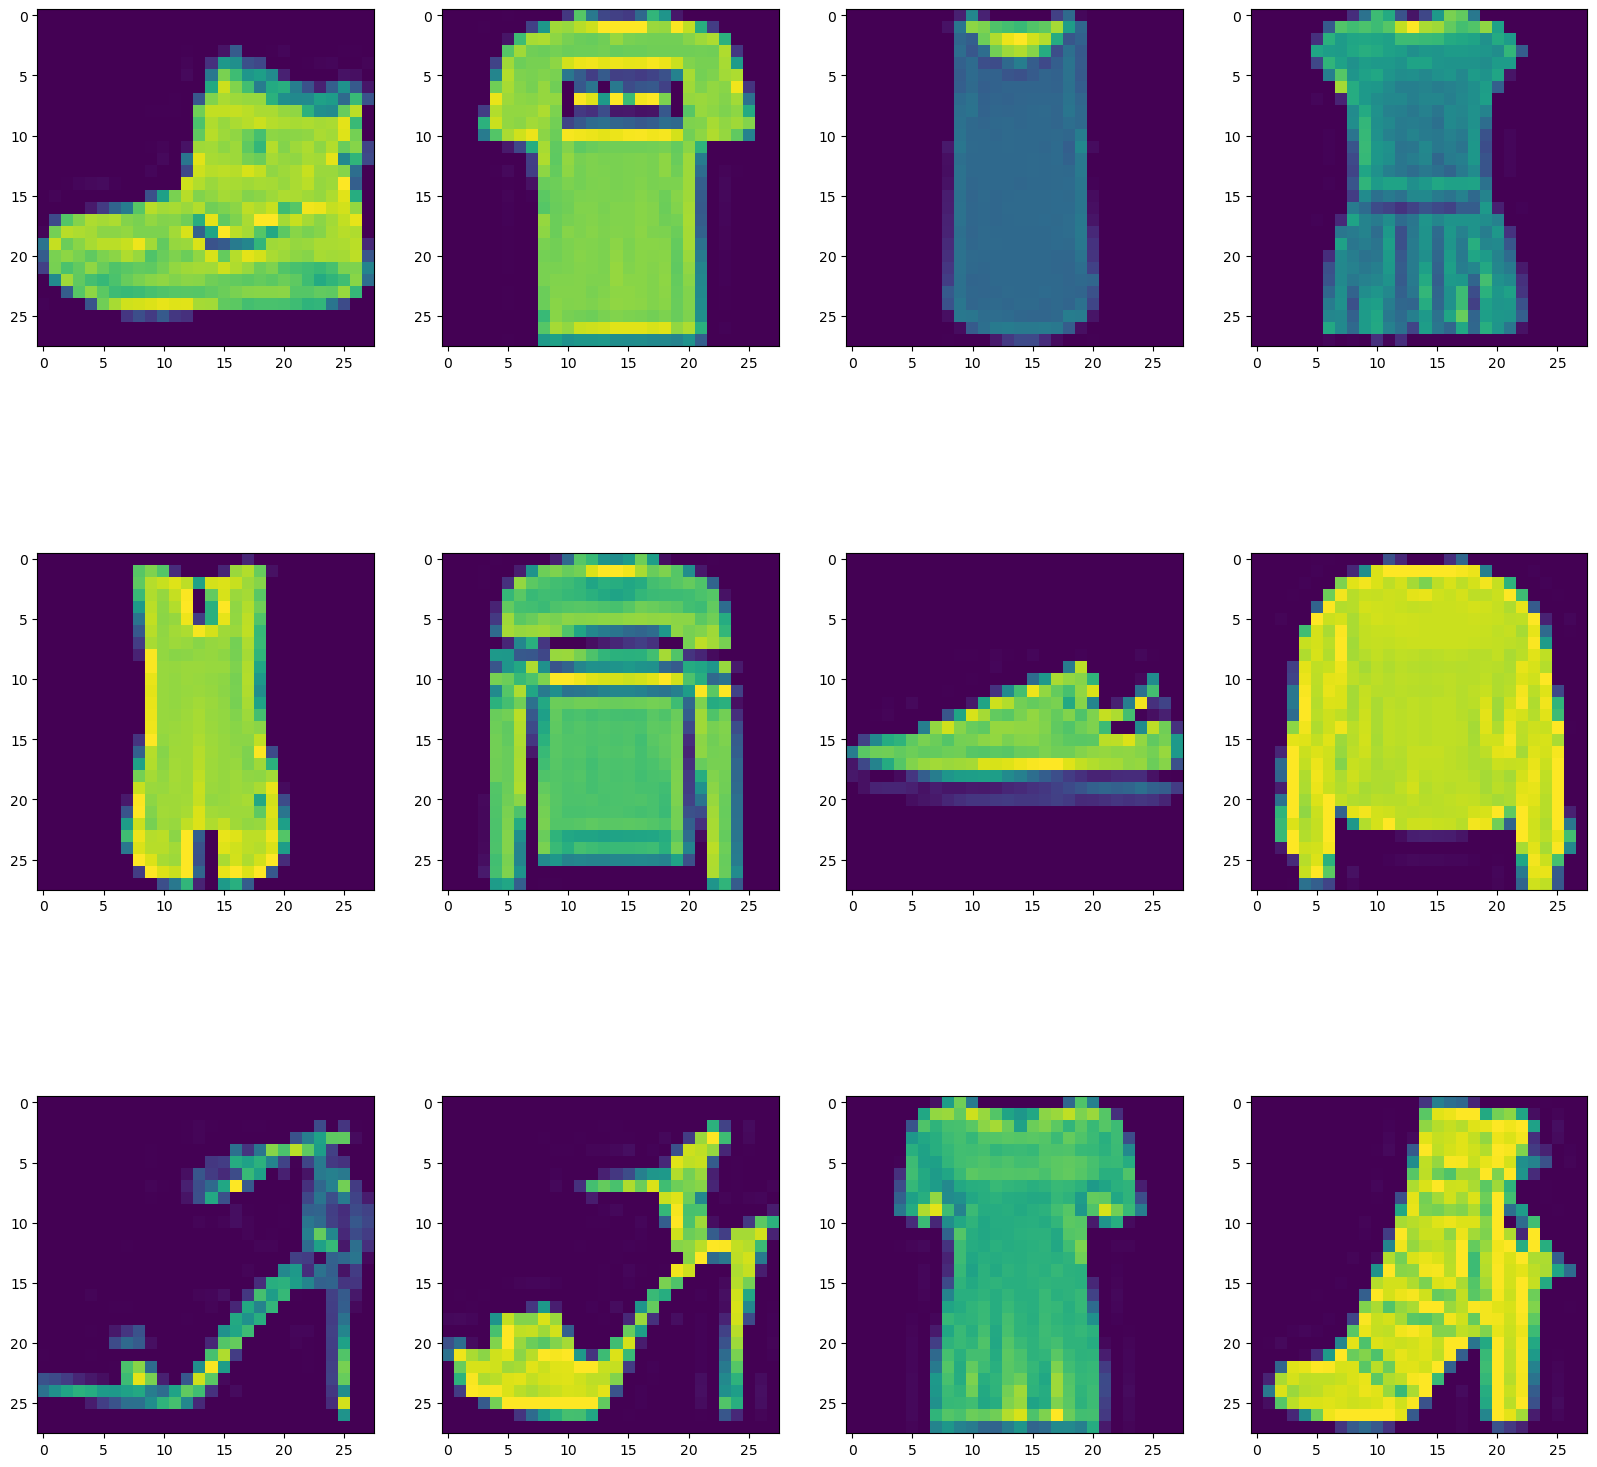

In [60]:
plt.subplots(3,4,figsize = (20,20))

for i in range(12):
    img_np = images[i]
    plt.subplot(3,4,1+i)
    plt.imshow(img_np)
plt.show()
# 3 a . visualizamos

In [61]:
#data2.keys()
X2=data2["X"][:]
y2=data2["y"][:]

In [69]:
from collections import Counter


In [66]:
X2.shape # 60000 imagenes , de 28 * 28

(60000, 28, 28)

In [73]:
Counter(y2).keys() # 10 valores de etiquetas diferentes del 0 al  9  (capa 3)

dict_keys([9, 0, 3, 2, 7, 5, 1, 6, 4, 8])

In [75]:
#
from torch.utils.data import Dataset
import torch
from random import shuffle
from torchvision import transforms
from torch import nn,optim
import time
import h5py
import cv2

In [76]:
class h5Data(Dataset):
    def __init__ (self,File, transform=None):
        self.archivo = h5py.File(File, 'r')
        self.labels = self.archivo['y']
        self.data = self.archivo['X']
        self.transform = transform
    def __getitem__(self,index):
        datum = self.data[index].reshape(1, -1)
        if self.transform is not None:
            datum = self.transform(datum)
        return datum, self.labels[index]
    def __len__(self):
        return len(self.labels)
    def close(self):
        self.archivo.close()	


In [79]:

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

train_loader=torch.utils.data.DataLoader(h5Data("prendas_dataset.h5",transform),batch_size=64,shuffle=True)
input_size=784
hidden_sizes=[64,32]
outputSize=10
# 3 configuramos la red
model=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),nn.ReLU(),
                    nn.Linear(hidden_sizes[0],hidden_sizes[1]),nn.ReLU(),
                    nn.Linear(hidden_sizes[1],outputSize),nn.LogSoftmax(dim=1))


criterion=nn.CrossEntropyLoss()


images,labels=next(iter(train_loader))
images=images.view(images.shape[0],-1)
logps=model(images.float())
loss = criterion(logps, labels)

loss.backward()

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
#set start
st = time.time()
epochs = 2
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
        
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
torch.save(model, 'prendas.pt')
# 3 c entrenamos y reconocemos

Epoch 0 - Training loss: 0.7765945188526405
Epoch 1 - Training loss: 0.4672978858926149
Execution time: 12.164755821228027 seconds


In [80]:
#cargamos el modleo
trained_model = torch.load("/Users/gabriel1chiro/Developer/modelado/prendas.pt")
trained_model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [148]:
import cv2
import torch
from torch.autograd import Variable
from torchvision import transforms
import torch.nn.functional as rna

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


In [153]:
images2 = data2['X'][:]
print(images2.shape)



(60000, 28, 28)


In [154]:

reshaped_array= images2.reshape(images2.shape[0], (images2.shape[1]*images2.shape[2]))
print(reshaped_array.shape)

(60000, 784)


(1, 784)
0
(1, 784)
0


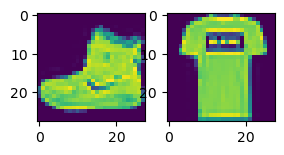

In [157]:
for i in range(2):
    img_np = reshaped_array[i]
    img_np = img_np.reshape(1, -1)
    print(img_np.shape)
    img_np = transform(img_np)
    img_np.unsqueeze_(dim=0)
    img_np = Variable(img_np)
    predict = rna.softmax(trained_model(img_np), dim=1)
    prediction = str(predict.argmax().item())
    print(prediction)
    plt.subplot(3,4,1+i)
    plt.imshow(images[i])
